In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
file=r'./sales_data.csv'

In [3]:
#Parse date and time in onw column only.

df_ped_ses_prod=pd.read_csv(file, parse_dates=[[4,5]])
df_ped_ses_prod.tail()

C:\Users\luzna\AppData\Local\Temp\ipykernel_14584\304288124.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ped_ses_prod=pd.read_csv(file, parse_dates=[[4,5]])


,fecha_sistema_hora,id_sesion_pedido,id_pedido,id_pedido_producto,id_producto,clasificador_grupo,nombre,precio,cantidad,saldo_inicial,saldo_final,es_cortesia,valor_precio_tabla,fecha_inicio_vig_prec_prod
432064,2021-10-09 21:36:47,392920,532292,696513,270,MENU,Sand de Pollo Bufalo,23.0,1,0,NaN,False,23.0,2021-03-01
432065,2021-10-09 21:36:47,392920,532292,696515,20331,MENU,STEAK SANDWICH,25.0,1,0,NaN,False,25.0,2021-03-01
432066,2021-10-09 21:43:08,392920,532293,696518,20298,MENU,PEDIDOS YA,1.0,5,0,NaN,False,1.0,2020-05-30
432067,2021-10-09 21:43:08,392920,532293,696517,13296,MENU,Sand Lomito,26.0,1,0,NaN,False,26.0,2021-03-01
432068,2021-10-09 21:45:42,392920,532294,696519,260,OTROS,Papas adicionales,10.0,1,0,NaN,False,10.0,2016-01-01


In [4]:
#Make a copy to work with
df_ped_ses_prod_c=df_ped_ses_prod.copy()

## Study elements in table

In [5]:
#Get a list of the columns 
df_ped_ses_prod_c.columns

Index(['fecha_sistema_hora', 'id_sesion_pedido', 'id_pedido',
       'id_pedido_producto', 'id_producto', 'clasificador_grupo', 'nombre',
       'precio', 'cantidad', 'saldo_inicial', 'saldo_final', 'es_cortesia',
       'valor_precio_tabla', 'fecha_inicio_vig_prec_prod'],
      dtype='object')

In [6]:
#Get the shape of the data frame
df_ped_ses_prod_c.shape

(432069, 14)

## Clean data

In [7]:
#Get general information of the data frame
df_ped_ses_prod_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432069 entries, 0 to 432068
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha_sistema_hora          432069 non-null  datetime64[ns]
 1   id_sesion_pedido            432069 non-null  int64         
 2   id_pedido                   432069 non-null  int64         
 3   id_pedido_producto          432069 non-null  int64         
 4   id_producto                 432069 non-null  int64         
 5   clasificador_grupo          432069 non-null  object        
 6   nombre                      432069 non-null  object        
 7   precio                      432069 non-null  float64       
 8   cantidad                    432069 non-null  int64         
 9   saldo_inicial               432069 non-null  int64         
 10  saldo_final                 430841 non-null  float64       
 11  es_cortesia                 429826 non-

In [8]:
#convert 'fecha_inicio_vig_prec_prod' to a date time type
df_ped_ses_prod_c['fecha_inicio_vig_prec_prod']=pd.to_datetime(df_ped_ses_prod_c['fecha_inicio_vig_prec_prod'], format='%Y-%m-%d')

In [9]:
df_ped_ses_prod_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432069 entries, 0 to 432068
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha_sistema_hora          432069 non-null  datetime64[ns]
 1   id_sesion_pedido            432069 non-null  int64         
 2   id_pedido                   432069 non-null  int64         
 3   id_pedido_producto          432069 non-null  int64         
 4   id_producto                 432069 non-null  int64         
 5   clasificador_grupo          432069 non-null  object        
 6   nombre                      432069 non-null  object        
 7   precio                      432069 non-null  float64       
 8   cantidad                    432069 non-null  int64         
 9   saldo_inicial               432069 non-null  int64         
 10  saldo_final                 430841 non-null  float64       
 11  es_cortesia                 429826 non-

In [10]:
#Identify null values
df_ped_ses_prod_c.isnull().sum()

fecha_sistema_hora               0
id_sesion_pedido                 0
id_pedido                        0
id_pedido_producto               0
id_producto                      0
clasificador_grupo               0
nombre                           0
precio                           0
cantidad                         0
saldo_inicial                    0
saldo_final                   1228
es_cortesia                   2243
valor_precio_tabla               0
fecha_inicio_vig_prec_prod       0
dtype: int64

In [11]:
# Review Null values of 'cortesia' 
[df_ped_ses_prod_c['es_cortesia'].isnull()]

[0          True
 1          True
 2          True
 3          True
 4          True
           ...  
 432064    False
 432065    False
 432066    False
 432067    False
 432068    False
 Name: es_cortesia, Length: 432069, dtype: bool]

In [12]:
#Make 'cortesia' NULL values to 0    
df_ped_ses_prod_c['es_cortesia']=df_ped_ses_prod_c['es_cortesia'].fillna(False)

In [13]:
#Analize 'saldo_final'
df_ped_ses_prod_c.loc[:,['saldo_inicial','saldo_final']]

,saldo_inicial,saldo_final
0,500,620.0
1,500,620.0
2,500,620.0
3,500,620.0
4,500,0.0
...,...,...
432064,0,NaN
432065,0,NaN
432066,0,NaN
432067,0,NaN


In [14]:
#Make 'saldo_final' NULL values to 0
df_ped_ses_prod_c['saldo_final'].fillna(0, inplace=True)

In [15]:
#Analyze wether there are null values
df_ped_ses_prod_c.isnull().sum()

fecha_sistema_hora            0
id_sesion_pedido              0
id_pedido                     0
id_pedido_producto            0
id_producto                   0
clasificador_grupo            0
nombre                        0
precio                        0
cantidad                      0
saldo_inicial                 0
saldo_final                   0
es_cortesia                   0
valor_precio_tabla            0
fecha_inicio_vig_prec_prod    0
dtype: int64

In [16]:
df_ped_ses_prod_c.head()

,fecha_sistema_hora,id_sesion_pedido,id_pedido,id_pedido_producto,id_producto,clasificador_grupo,nombre,precio,cantidad,saldo_inicial,saldo_final,es_cortesia,valor_precio_tabla,fecha_inicio_vig_prec_prod
0,2016-07-05 21:46:33,4,3208,3690,11,MENU,Sand Filadelfia,18.0,1,500,620.0,False,23.0,2021-03-01
1,2016-07-05 22:00:30,4,3209,3691,270,MENU,Sand de Pollo Bufalo,20.0,1,500,620.0,False,23.0,2021-03-01
2,2016-07-05 23:04:04,4,3210,3693,272,BEBIDAS,Aquarius 500,8.0,1,500,620.0,False,8.0,2016-07-05
3,2016-07-05 23:04:04,4,3210,3692,273,MENU,Fingers miel,22.0,1,500,620.0,False,26.0,2021-03-01
4,2016-07-07 23:03:19,6,3211,3694,2,MENU,Alitas Bufalo,27.0,1,500,0.0,False,32.0,2021-03-01


## Defining sales 

In [17]:
#Add a column name 'ventas' meaning total of sales
df_ped_ses_prod_c['ventas_precio1']= df_ped_ses_prod_c['precio'] * df_ped_ses_prod_c['cantidad']

In [18]:
df_ped_ses_prod_c['ventas_precio_tabla']= df_ped_ses_prod_c['valor_precio_tabla'] * df_ped_ses_prod_c['cantidad']

In [19]:
#Define columns to work with
df_sales_analysis=df_ped_ses_prod_c.loc[:,['fecha_sistema_hora','clasificador_grupo','nombre', 'cantidad','precio', 'valor_precio_tabla', 'ventas_precio1','ventas_precio_tabla', 'es_cortesia']]
df_sales_analysis.head()

,fecha_sistema_hora,clasificador_grupo,nombre,cantidad,precio,valor_precio_tabla,ventas_precio1,ventas_precio_tabla,es_cortesia
0,2016-07-05 21:46:33,MENU,Sand Filadelfia,1,18.0,23.0,18.0,23.0,False
1,2016-07-05 22:00:30,MENU,Sand de Pollo Bufalo,1,20.0,23.0,20.0,23.0,False
2,2016-07-05 23:04:04,BEBIDAS,Aquarius 500,1,8.0,8.0,8.0,8.0,False
3,2016-07-05 23:04:04,MENU,Fingers miel,1,22.0,26.0,22.0,26.0,False
4,2016-07-07 23:03:19,MENU,Alitas Bufalo,1,27.0,32.0,27.0,32.0,False


In [20]:
df_sales_analysis.tail()

,fecha_sistema_hora,clasificador_grupo,nombre,cantidad,precio,valor_precio_tabla,ventas_precio1,ventas_precio_tabla,es_cortesia
432064,2021-10-09 21:36:47,MENU,Sand de Pollo Bufalo,1,23.0,23.0,23.0,23.0,False
432065,2021-10-09 21:36:47,MENU,STEAK SANDWICH,1,25.0,25.0,25.0,25.0,False
432066,2021-10-09 21:43:08,MENU,PEDIDOS YA,5,1.0,1.0,5.0,5.0,False
432067,2021-10-09 21:43:08,MENU,Sand Lomito,1,26.0,26.0,26.0,26.0,False
432068,2021-10-09 21:45:42,OTROS,Papas adicionales,1,10.0,10.0,10.0,10.0,False


In [21]:
list(df_sales_analysis['fecha_sistema_hora'].dt.year.unique())

[2016, 2017, 2018, 2019, 2020, 2021]

In [22]:
#Establish date time as an index of the data frame
df_sales_analysis.set_index('fecha_sistema_hora', inplace=True)

In [23]:
#Create to Dataframes. 1) with price 1, 2) with price of the price table
df_sales_analysis1=df_sales_analysis.loc[:,['clasificador_grupo','nombre','cantidad', 'precio', 'ventas_precio1', 'es_cortesia']]
df_sales_analysis2=df_sales_analysis.loc[:,['clasificador_grupo','nombre','cantidad', 'valor_precio_tabla', 'ventas_precio_tabla', 'es_cortesia']]

In [24]:
#Rename columns for greater clarity
df_sales_analysis1.rename(columns={'nombre':'producto', 'precio': 'precio1','ventas_precio1':'ventas1'}, inplace=True)

In [25]:
df_sales_analysis2.rename(columns={'nombre':'producto', 'valor_precio_tabla': 'precio2','ventas_precio_tabla':'ventas2'}, inplace=True)

In [26]:
df_sales_analysis1.head()

,clasificador_grupo,producto,cantidad,precio1,ventas1,es_cortesia
fecha_sistema_hora,,,,,,
2016-07-05 21:46:33,MENU,Sand Filadelfia,1,18.0,18.0,False
2016-07-05 22:00:30,MENU,Sand de Pollo Bufalo,1,20.0,20.0,False
2016-07-05 23:04:04,BEBIDAS,Aquarius 500,1,8.0,8.0,False
2016-07-05 23:04:04,MENU,Fingers miel,1,22.0,22.0,False
2016-07-07 23:03:19,MENU,Alitas Bufalo,1,27.0,27.0,False


In [27]:
df_sales_analysis2.head()

,clasificador_grupo,producto,cantidad,precio2,ventas2,es_cortesia
fecha_sistema_hora,,,,,,
2016-07-05 21:46:33,MENU,Sand Filadelfia,1,23.0,23.0,False
2016-07-05 22:00:30,MENU,Sand de Pollo Bufalo,1,23.0,23.0,False
2016-07-05 23:04:04,BEBIDAS,Aquarius 500,1,8.0,8.0,False
2016-07-05 23:04:04,MENU,Fingers miel,1,26.0,26.0,False
2016-07-07 23:03:19,MENU,Alitas Bufalo,1,32.0,32.0,False


# Goal 1. How many sales were realized within a year, month, day, hour with PRICE1

## 1.1. Determine in which YEAR there were more sales 

In [28]:
df_sales_analysis1.head()

,clasificador_grupo,producto,cantidad,precio1,ventas1,es_cortesia
fecha_sistema_hora,,,,,,
2016-07-05 21:46:33,MENU,Sand Filadelfia,1,18.0,18.0,False
2016-07-05 22:00:30,MENU,Sand de Pollo Bufalo,1,20.0,20.0,False
2016-07-05 23:04:04,BEBIDAS,Aquarius 500,1,8.0,8.0,False
2016-07-05 23:04:04,MENU,Fingers miel,1,22.0,22.0,False
2016-07-07 23:03:19,MENU,Alitas Bufalo,1,27.0,27.0,False


In [29]:
df_sales_analysis1_year=df_sales_analysis1.loc[:,['cantidad', 'ventas1', 'es_cortesia']].groupby(df_sales_analysis1.index.year).sum().sort_values('ventas1', ascending=False)
df_sales_analysis1_year.head()

,cantidad,ventas1,es_cortesia
fecha_sistema_hora,,,
2019,121904,2394510.5,15
2018,120260,2357893.0,65
2017,93051,1814396.5,69
2020,130638,1790425.0,18
2021,133662,1778236.5,31


In [30]:
#PLOT
#Define axes 
x=list(df_sales_analysis1_year.index)
y=df_sales_analysis1_year['ventas1']
y


fecha_sistema_hora
2019    2394510.5
2018    2357893.0
2017    1814396.5
2020    1790425.0
2021    1778236.5
2016     607484.0
Name: ventas1, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

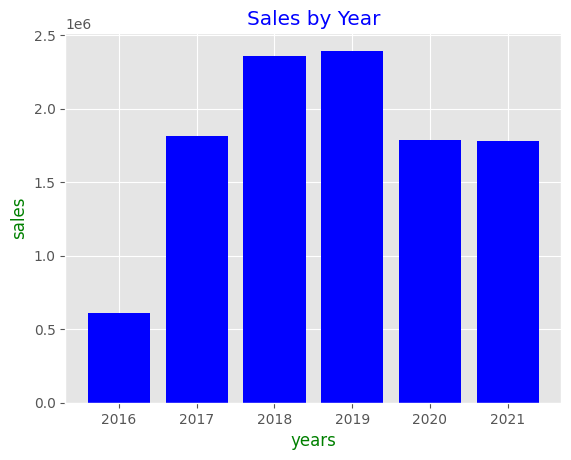

In [31]:
%matplotlib inline
plt.style.use('ggplot')

plt.bar(x,y,color='blue')

plt.xlabel('years', color='green')
plt.ylabel('sales', color='green')
plt.title('Sales by Year', color='blue')
plt.show

## 1.2. Determine in which MONTH were more sales on 2021

In [32]:
df_sales_analysis1.head()

,clasificador_grupo,producto,cantidad,precio1,ventas1,es_cortesia
fecha_sistema_hora,,,,,,
2016-07-05 21:46:33,MENU,Sand Filadelfia,1,18.0,18.0,False
2016-07-05 22:00:30,MENU,Sand de Pollo Bufalo,1,20.0,20.0,False
2016-07-05 23:04:04,BEBIDAS,Aquarius 500,1,8.0,8.0,False
2016-07-05 23:04:04,MENU,Fingers miel,1,22.0,22.0,False
2016-07-07 23:03:19,MENU,Alitas Bufalo,1,27.0,27.0,False


In [33]:
#filter data for just 2021

df_sales_analysis1_2021=df_sales_analysis1[df_sales_analysis1.index.year==2021]
df_sales_analysis1_2021.head()

,clasificador_grupo,producto,cantidad,precio1,ventas1,es_cortesia
fecha_sistema_hora,,,,,,
2021-01-02 12:09:28,MENU,ALITAS PICANTE 6 UNID,1,23.0,23.0,False
2021-01-02 12:15:55,MENU,ALITAS Bufalo 16 UNID,1,55.0,55.0,False
2021-01-02 12:15:55,MENU,hamburgues CRUNCHY,1,25.0,25.0,False
2021-01-02 12:15:55,OTROS,Salsa Picante,1,3.0,3.0,False
2021-01-02 12:15:55,MENU,Sand de Pollo Bufalo,1,22.0,22.0,False


In [34]:
df_sales_analysis1_2021.tail()

,clasificador_grupo,producto,cantidad,precio1,ventas1,es_cortesia
fecha_sistema_hora,,,,,,
2021-10-09 21:36:47,MENU,Sand de Pollo Bufalo,1,23.0,23.0,False
2021-10-09 21:36:47,MENU,STEAK SANDWICH,1,25.0,25.0,False
2021-10-09 21:43:08,MENU,PEDIDOS YA,5,1.0,5.0,False
2021-10-09 21:43:08,MENU,Sand Lomito,1,26.0,26.0,False
2021-10-09 21:45:42,OTROS,Papas adicionales,1,10.0,10.0,False


In [35]:

df_sales_analysis1_2021_month=df_sales_analysis1_2021.loc[:,['cantidad', 'ventas1', 'es_cortesia']].groupby(df_sales_analysis1_2021.index.month).sum().sort_values('ventas1', ascending=False)
df_sales_analysis1_2021_month

,cantidad,ventas1,es_cortesia
fecha_sistema_hora,,,
7,15637,205587.5,0
9,16451,202622.5,6
5,14696,202018.5,1
8,16217,201161.0,5
3,13479,194405.5,12
1,14860,192808.5,1
4,12891,183166.0,0
6,13079,178214.5,2
2,11391,154858.0,2


In [36]:
#PLOT
#Define axes

x=list(df_sales_analysis1_2021_month.index)
y=df_sales_analysis1_2021_month['ventas1']


<function matplotlib.pyplot.show(close=None, block=None)>

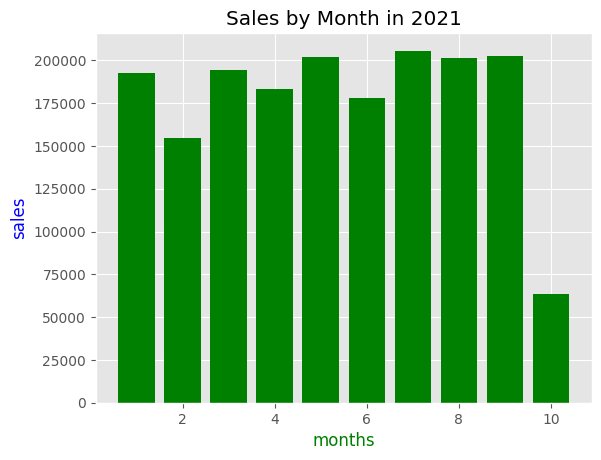

In [37]:
#plot
plt.bar(x,y,color='green')

plt.xlabel('months', color='green')
#plt.xticks(range(len(x)),x)

plt.ylabel('sales', color='blue')
plt.title('Sales by Month in 2021')
plt.show

## 1.3. Determine in which WEEK there were more sales

In [38]:
df_sales_analysis1_2021.head()

,clasificador_grupo,producto,cantidad,precio1,ventas1,es_cortesia
fecha_sistema_hora,,,,,,
2021-01-02 12:09:28,MENU,ALITAS PICANTE 6 UNID,1,23.0,23.0,False
2021-01-02 12:15:55,MENU,ALITAS Bufalo 16 UNID,1,55.0,55.0,False
2021-01-02 12:15:55,MENU,hamburgues CRUNCHY,1,25.0,25.0,False
2021-01-02 12:15:55,OTROS,Salsa Picante,1,3.0,3.0,False
2021-01-02 12:15:55,MENU,Sand de Pollo Bufalo,1,22.0,22.0,False


In [39]:

df_sales_analysis1_2021_week=df_sales_analysis1_2021.loc[:,['cantidad', 'ventas1', 'es_cortesia']].groupby(df_sales_analysis1_2021.index.to_period('W')).sum().sort_values('ventas1', ascending=False).head(10)
df_sales_analysis1_2021_week


,cantidad,ventas1,es_cortesia
fecha_sistema_hora,,,
2021-09-20/2021-09-26,4148,53174.5,2
2021-01-11/2021-01-17,3794,49517.5,1
2021-01-04/2021-01-10,3814,49422.0,0
2021-05-24/2021-05-30,3438,48709.0,0
2021-05-31/2021-06-06,3496,48679.0,0
2021-04-12/2021-04-18,3484,48193.0,0
2021-03-08/2021-03-14,3405,48007.5,0
2021-08-30/2021-09-05,3609,47968.5,1
2021-09-06/2021-09-12,4089,47611.5,3


## 1.4. Determine in which HOUR were more sales

In [40]:
df_sales_analysis1_2021.head()

,clasificador_grupo,producto,cantidad,precio1,ventas1,es_cortesia
fecha_sistema_hora,,,,,,
2021-01-02 12:09:28,MENU,ALITAS PICANTE 6 UNID,1,23.0,23.0,False
2021-01-02 12:15:55,MENU,ALITAS Bufalo 16 UNID,1,55.0,55.0,False
2021-01-02 12:15:55,MENU,hamburgues CRUNCHY,1,25.0,25.0,False
2021-01-02 12:15:55,OTROS,Salsa Picante,1,3.0,3.0,False
2021-01-02 12:15:55,MENU,Sand de Pollo Bufalo,1,22.0,22.0,False


In [41]:

df_sales_analysis1_2021_hour=df_sales_analysis1_2021.loc[:,['cantidad', 'ventas1', 'es_cortesia']].groupby(df_sales_analysis1_2021.index.hour).sum().sort_values('ventas1', ascending=False)
df_sales_analysis1_2021_hour

,cantidad,ventas1,es_cortesia
fecha_sistema_hora,,,
19,21575,281046.5,7
20,20562,250121.5,4
13,15428,218477.5,8
18,15101,210083.0,3
12,14648,194329.5,0
17,10287,148890.0,0
14,9937,144598.0,2
21,10913,114608.0,2
16,7070,100884.5,2


In [42]:
#PLOT
#Define axes

x=list(df_sales_analysis1_2021_hour.index)
y=df_sales_analysis1_2021_hour['ventas1']

<function matplotlib.pyplot.show(close=None, block=None)>

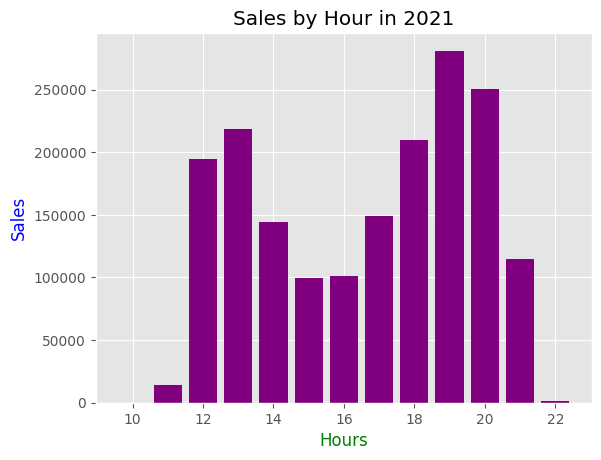

In [43]:
plt.bar(x,y,color='purple')

plt.xlabel('Hours', color='green')
plt.ylabel('Sales', color='blue')
plt.title('Sales by Hour in 2021')
plt.show